In [3]:
!python --version

Python 3.8.3


In [4]:
!pip install tensorflow

     |████████████████████████████████| 165.2 MB 452 kB/s eta 0:00:01
     |████████████████████████████████| 96 kB 558 kB/s eta 0:00:01
  Attempting uninstall: markdown
    Found existing installation: Markdown 2.6.5
    Uninstalling Markdown-2.6.5:
      Successfully uninstalled Markdown-2.6.5


In [7]:
!pip install folium

  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8


In [1]:
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
#from folium import plugins
import geopandas
import os

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
import sklearn.neighbors as neg
import json

import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')

#import folium
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, style
import seaborn as sns
style.use('ggplot')
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
apt = pd.read_csv('소득구분아파트실거래가_도로명.csv').drop(['Unnamed: 0'],axis=1)
apt

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,bcode,bname,hcode,hname,latlng
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201712,8,"124,000",3,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201712,22,"123,500",4,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201712,28,"91,500",5,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240492,서울특별시 중랑구 중화동,274-77,274,77,한영(104),70.96,202001,28,"31,200",4,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"
240493,서울특별시 중랑구 중화동,274-77,274,77,한영(104),66.24,202002,3,"28,500",5,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"
240494,서울특별시 중랑구 중화동,274-77,274,77,한영(104),106.21,202003,11,"45,400",6,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"
240495,서울특별시 중랑구 중화동,274-77,274,77,한영(104),67.57,202008,7,"26,000",2,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"


In [3]:
apt.dropna(inplace=True)
apt.reset_index(drop=True,inplace=True)
apt

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,bcode,bname,hcode,hname,latlng
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201712,8,"124,000",3,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201712,22,"123,500",4,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201712,28,"91,500",5,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987,언주로 3,1.168010e+09,개포동,1.168069e+09,개포4동,"37.4763731,127.0580459"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239154,서울특별시 중랑구 중화동,274-77,274,77,한영(104),70.96,202001,28,"31,200",4,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"
239155,서울특별시 중랑구 중화동,274-77,274,77,한영(104),66.24,202002,3,"28,500",5,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"
239156,서울특별시 중랑구 중화동,274-77,274,77,한영(104),106.21,202003,11,"45,400",6,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"
239157,서울특별시 중랑구 중화동,274-77,274,77,한영(104),67.57,202008,7,"26,000",2,2003,동일로144길 74,1.126010e+09,중화동,1.126060e+09,중화제1동,"37.6065940,127.0824144"


In [4]:
apt['위도'] = [float(apt['latlng'][i].split(',')[0]) for i in range(len(apt))]
apt['경도'] = [float(apt['latlng'][i].split(',')[1]) for i in range(len(apt))]

In [5]:
len(apt['hname'].unique())

421

In [5]:
apt.columns = ['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '법정동코드', '법정동', '행정동코드', '행정동', 'latlng', '위도',
       '경도']

In [6]:
for i in range(len(apt)):
    apt.행정동코드[i] = str(int(apt.행정동코드[i]))
    apt.법정동코드[i] = str(int(apt.법정동코드[i]))

In [8]:
apt = apt[['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '법정동','행정동','행정동코드', '위도',
       '경도']]

In [7]:
apt['거래금액(만원)'] = [int(x.split()[0].replace(',','')) for x in apt['거래금액(만원)']]

In [8]:
# 면적당 실거래가
apt['면적당거래금액'] = apt['거래금액(만원)'].astype(np.float64) / apt['전용면적(㎡)'].astype(np.float64)

In [11]:
# apt.to_csv('3개년아파트실거래가.csv')
# apt.to_pickle('3개년아파트실거래가.pkl')

In [33]:
apt = pd.read_pickle('3개년아파트실거래가.pkl')
apt

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,법정동,행정동,행정동코드,위도,경도,면적당거래금액
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201712,8,124000,3,1987,언주로 3,개포동,개포4동,1.168069e+09,37.476373,127.058046,1550.581468
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201712,22,123500,4,1987,언주로 3,개포동,개포4동,1.168069e+09,37.476373,127.058046,1544.329123
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201712,28,91500,5,1987,언주로 3,개포동,개포4동,1.168069e+09,37.476373,127.058046,1664.241542
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,130000,4,1987,언주로 3,개포동,개포4동,1.168069e+09,37.476373,127.058046,1625.609604
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,117000,2,1987,언주로 3,개포동,개포4동,1.168069e+09,37.476373,127.058046,1463.048643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239154,서울특별시 중랑구 중화동,274-77,274,77,한영(104),70.96,202001,28,31200,4,2003,동일로144길 74,중화동,중화제1동,1.126060e+09,37.606594,127.082414,439.684329
239155,서울특별시 중랑구 중화동,274-77,274,77,한영(104),66.24,202002,3,28500,5,2003,동일로144길 74,중화동,중화제1동,1.126060e+09,37.606594,127.082414,430.253623
239156,서울특별시 중랑구 중화동,274-77,274,77,한영(104),106.21,202003,11,45400,6,2003,동일로144길 74,중화동,중화제1동,1.126060e+09,37.606594,127.082414,427.455042
239157,서울특별시 중랑구 중화동,274-77,274,77,한영(104),67.57,202008,7,26000,2,2003,동일로144길 74,중화동,중화제1동,1.126060e+09,37.606594,127.082414,384.786148


In [34]:
apt = apt[['시군구','전용면적(㎡)','거래금액(만원)','행정동','행정동코드','위도','경도','면적당거래금액']]

In [35]:
apt['행정동코드'] = [str(int(x)) for x in apt['행정동코드']]

In [36]:
apt

,시군구,전용면적(㎡),거래금액(만원),행정동,행정동코드,위도,경도,면적당거래금액
0,서울특별시 강남구 개포동,79.97,124000,개포4동,1168069000,37.476373,127.058046,1550.581468
1,서울특별시 강남구 개포동,79.97,123500,개포4동,1168069000,37.476373,127.058046,1544.329123
2,서울특별시 강남구 개포동,54.98,91500,개포4동,1168069000,37.476373,127.058046,1664.241542
3,서울특별시 강남구 개포동,79.97,130000,개포4동,1168069000,37.476373,127.058046,1625.609604
4,서울특별시 강남구 개포동,79.97,117000,개포4동,1168069000,37.476373,127.058046,1463.048643
...,...,...,...,...,...,...,...,...
239154,서울특별시 중랑구 중화동,70.96,31200,중화제1동,1126060000,37.606594,127.082414,439.684329
239155,서울특별시 중랑구 중화동,66.24,28500,중화제1동,1126060000,37.606594,127.082414,430.253623
239156,서울특별시 중랑구 중화동,106.21,45400,중화제1동,1126060000,37.606594,127.082414,427.455042
239157,서울특별시 중랑구 중화동,67.57,26000,중화제1동,1126060000,37.606594,127.082414,384.786148


In [37]:
apt['면적당거래금액']

0         1550.581468
1         1544.329123
2         1664.241542
3         1625.609604
4         1463.048643
             ...     
239154     439.684329
239155     430.253623
239156     427.455042
239157     384.786148
239158     458.619971
Name: 면적당거래금액, Length: 239159, dtype: float64

In [38]:
train_X = apt[['위도','경도']].astype(np.float64)
#y = apt['면적당거래금액']
train_y = apt['면적당거래금액']

In [39]:
# 격자 기준으로 knn
test_X = pd.read_csv('1109_동3개_초등학교881m_인구.csv')
test_X = test_X[['gid','행정동코드','시군구명','행정동','학교명','위도','경도']]
test_X

,gid,행정동코드,시군구명,행정동,학교명,위도,경도
0,다사57ab56ab,1129066000,성북구,길음제1동,['서울숭덕초등학교' '서울길원초등학교' '서울길음초등학교' '서울미아초등학교' '...,37.605811,127.017082
1,다사57ab56ba,1129066000,성북구,길음제1동,['서울숭덕초등학교' '서울길원초등학교' '서울길음초등학교' '서울미아초등학교'],37.608064,127.017067
2,다사57ab56bb,1129066000,성북구,길음제1동,['서울숭덕초등학교' '서울길원초등학교' '서울길음초등학교' '서울미아초등학교' '...,37.610318,127.017053
3,다사57ab57aa,1129066000,성북구,길음제1동,['서울길원초등학교' '서울길음초등학교' '서울미아초등학교' '서울삼각산초등학교' ...,37.612571,127.017038
4,다사57ba56aa,1129066000,성북구,길음제1동,['서울정덕초등학교' '서울숭덕초등학교' '서울길원초등학교' '서울미아초등학교' '...,37.603569,127.019929
...,...,...,...,...,...,...,...
57,다사59aa58bb,1130560300,강북구,번2동,['서울신화초등학교' '서울번동초등학교' '서울화계초등학교'],37.628423,127.036768
58,다사59aa59aa,1130560300,강북구,번2동,['서울신창초등학교' '서울신화초등학교' '서울번동초등학교' '서울수송초등학교'],37.630677,127.036754
59,다사59aa59ab,1130560300,강북구,번2동,['서울신창초등학교' '서울신화초등학교' '서울번동초등학교' '서울수송초등학교'],37.632930,127.036740
60,다사59ab59aa,1130560300,강북구,번2동,['서울신창초등학교' '서울신화초등학교' '서울번동초등학교'],37.630688,127.039587


In [40]:
test_X.iloc[:,5:7]

,위도,경도
0,37.605811,127.017082
1,37.608064,127.017067
2,37.610318,127.017053
3,37.612571,127.017038
4,37.603569,127.019929
...,...,...
57,37.628423,127.036768
58,37.630677,127.036754
59,37.632930,127.036740
60,37.630688,127.039587


In [41]:
test_X.행정동.unique()

array(['길음제1동', '목5동', '번2동'], dtype=object)

In [42]:
#test_X = test_X[test_X.행정동 == '상계8동']
test_X

,gid,행정동코드,시군구명,행정동,학교명,위도,경도
0,다사57ab56ab,1129066000,성북구,길음제1동,['서울숭덕초등학교' '서울길원초등학교' '서울길음초등학교' '서울미아초등학교' '...,37.605811,127.017082
1,다사57ab56ba,1129066000,성북구,길음제1동,['서울숭덕초등학교' '서울길원초등학교' '서울길음초등학교' '서울미아초등학교'],37.608064,127.017067
2,다사57ab56bb,1129066000,성북구,길음제1동,['서울숭덕초등학교' '서울길원초등학교' '서울길음초등학교' '서울미아초등학교' '...,37.610318,127.017053
3,다사57ab57aa,1129066000,성북구,길음제1동,['서울길원초등학교' '서울길음초등학교' '서울미아초등학교' '서울삼각산초등학교' ...,37.612571,127.017038
4,다사57ba56aa,1129066000,성북구,길음제1동,['서울정덕초등학교' '서울숭덕초등학교' '서울길원초등학교' '서울미아초등학교' '...,37.603569,127.019929
...,...,...,...,...,...,...,...
57,다사59aa58bb,1130560300,강북구,번2동,['서울신화초등학교' '서울번동초등학교' '서울화계초등학교'],37.628423,127.036768
58,다사59aa59aa,1130560300,강북구,번2동,['서울신창초등학교' '서울신화초등학교' '서울번동초등학교' '서울수송초등학교'],37.630677,127.036754
59,다사59aa59ab,1130560300,강북구,번2동,['서울신창초등학교' '서울신화초등학교' '서울번동초등학교' '서울수송초등학교'],37.632930,127.036740
60,다사59ab59aa,1130560300,강북구,번2동,['서울신창초등학교' '서울신화초등학교' '서울번동초등학교'],37.630688,127.039587


In [43]:
def k_grid_plot(k,rk):
    k_list = [k*i for i in range(1,11)]
    plt.figure(figsize=(30,10))
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k, p=2, metric='minkowski')
        knn.fit(train_X,train_y)   # X = 아파트 위도경도, y = 아파트 면적당실거래가

        pred = knn.predict(test_X.iloc[:,5:7])   # 행정동 위도경도
        test_X[f'추정소득 k={k}'] = pred
    m_income = test_X.groupby(['gid','행정동'],as_index=False).mean()
    #m_income['행정동코드'] = m_income.drop(['행정동코드'],axis=1)

    dong_df = m_income.copy()
    plt.figure(figsize=(30,10))
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk}'],label=f'k={rk}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*2}'],label=f'k={rk*2}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*3}'],label=f'k={rk*3}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*4}'],label=f'k={rk*4}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*5}'],label=f'k={rk*5}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*6}'],label=f'k={rk*6}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*7}'],label=f'k={rk*7}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*8}'],label=f'k={rk*8}')
    plt.plot(dong_df['gid'],dong_df[f'추정소득 k={rk*9}'],label=f'k={rk*9}')
    plt.title(f'KNN 격자별 추정소득')
    plt.legend(fontsize=15) 
    plt.rcParams['axes.grid'] = True
    
    return m_income

<Figure size 2160x720 with 0 Axes>

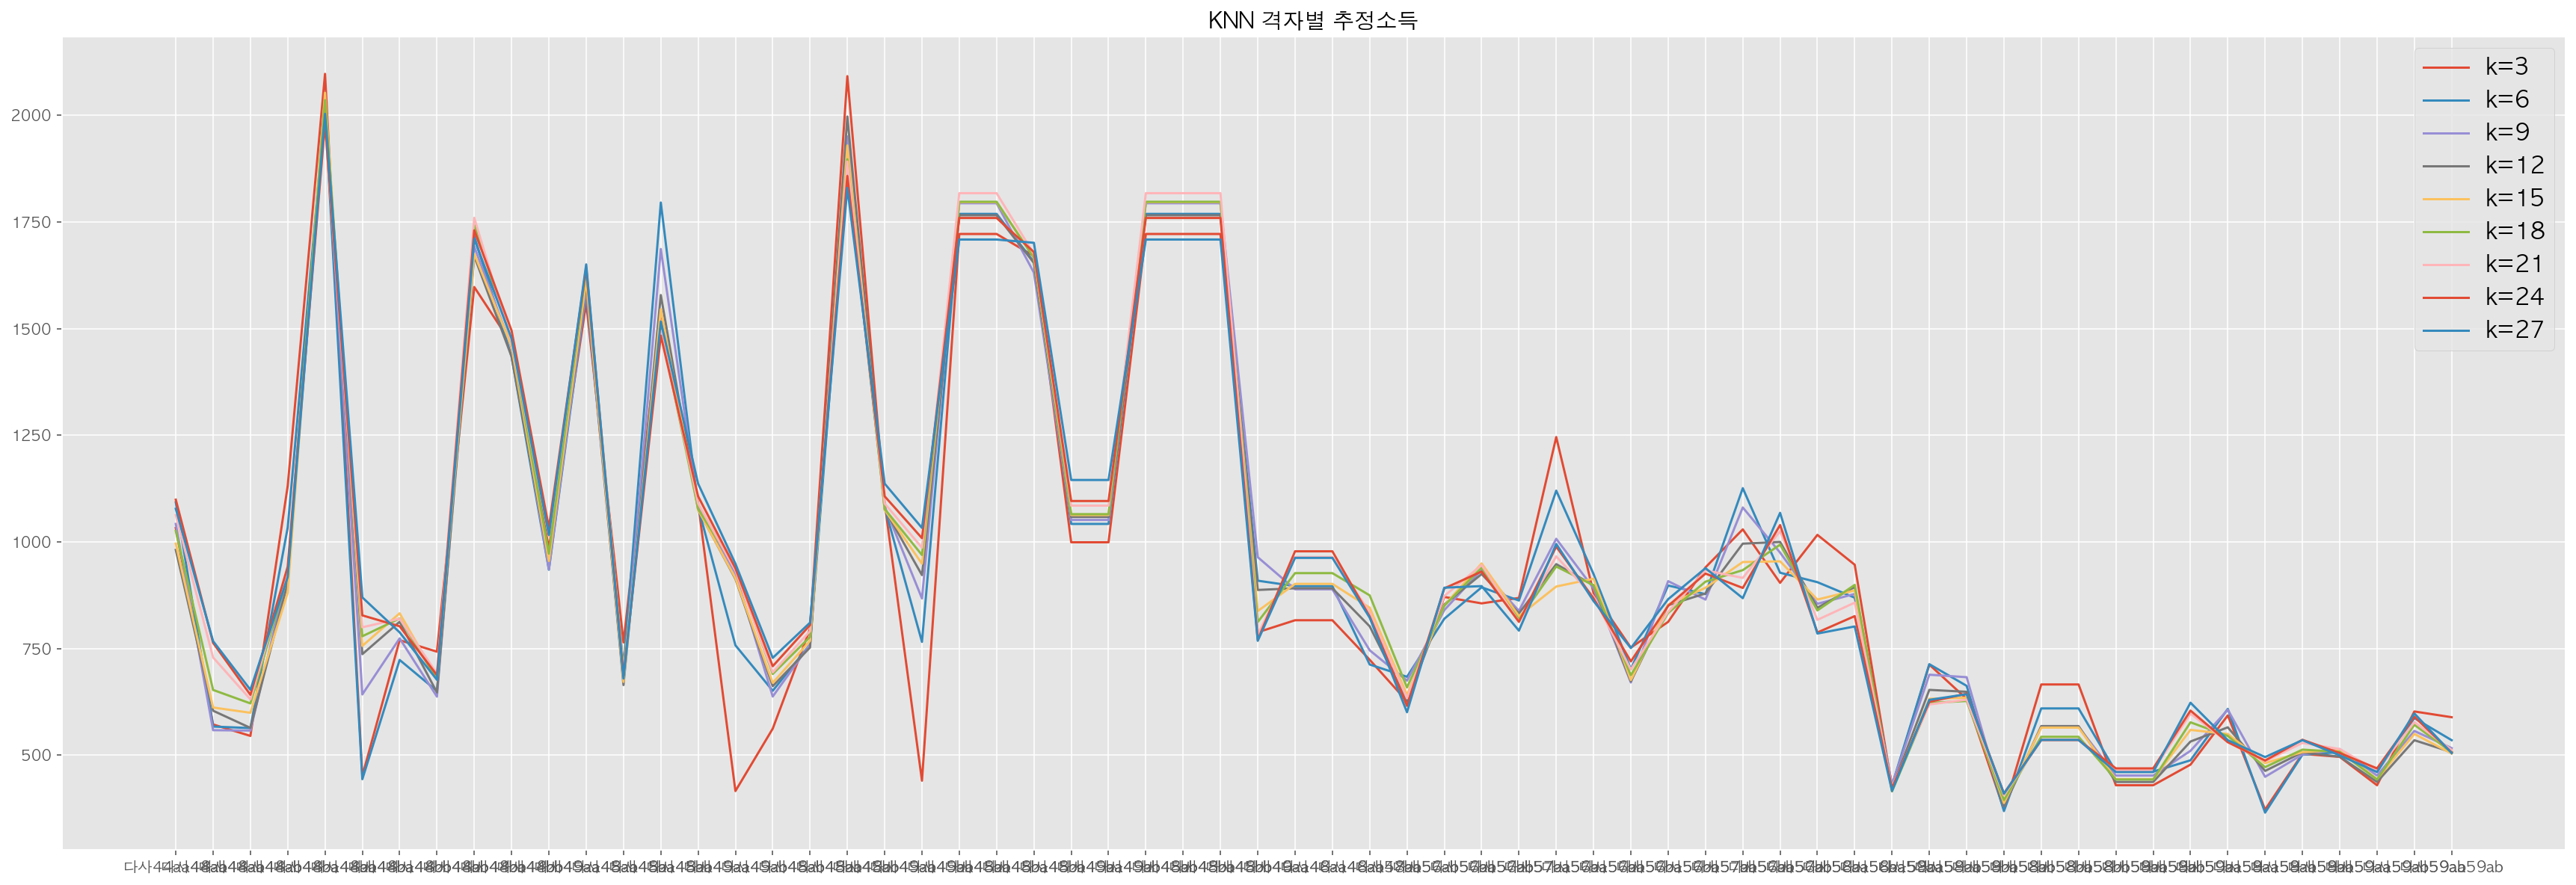

In [44]:
grid_income = k_grid_plot(3,3)

<Figure size 2160x720 with 0 Axes>

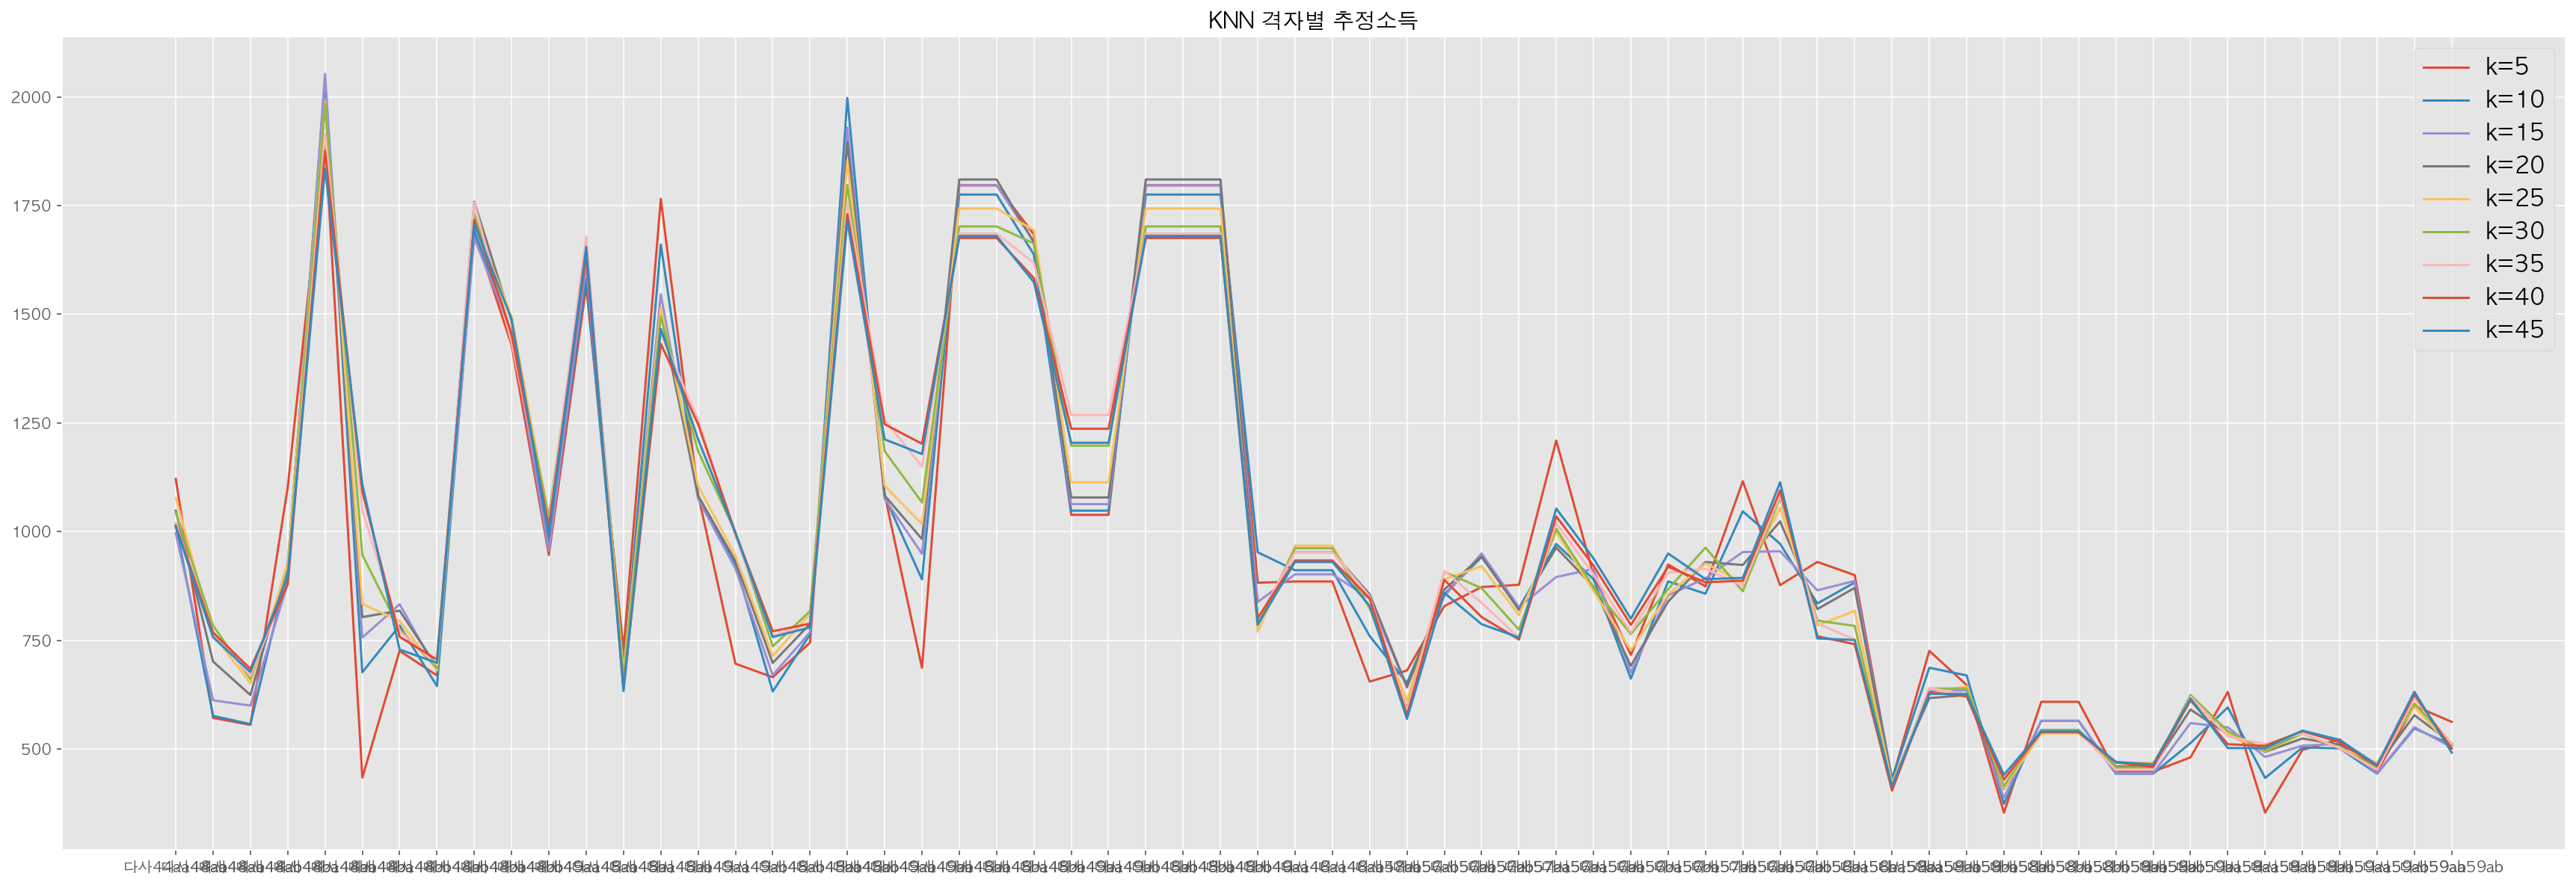

In [45]:
grid_income = k_grid_plot(5,5)

In [46]:
grid_income

,gid,행정동,행정동코드,위도,경도,추정소득 k=3,추정소득 k=6,추정소득 k=9,추정소득 k=12,추정소득 k=15,...,추정소득 k=27,추정소득 k=30,추정소득 k=5,추정소득 k=10,추정소득 k=20,추정소득 k=25,추정소득 k=35,추정소득 k=40,추정소득 k=45,추정소득 k=50
0,다사44aa48aa,목5동,1147055000,37.530744,126.867603,1032.792029,1093.266621,1042.382240,981.539563,996.199704,...,1077.956875,1043.702684,1121.286855,1014.867951,1048.012031,1077.349462,1019.798801,1013.788380,1010.797286,981.459078
1,다사44ab48aa,목5동,1147055000,37.530759,126.870432,572.322560,567.371673,558.856147,604.516492,612.025716,...,767.566678,783.651477,571.530418,576.257550,701.056870,763.686063,769.064423,767.757682,756.950743,765.657993
2,다사44ab48ab,목5동,1147055000,37.533012,126.870413,545.444100,563.834218,557.950104,564.238373,599.690203,...,653.607610,661.019302,555.403342,557.288173,624.217383,651.133469,667.846330,684.248881,677.002799,669.183839
3,다사44ab48ba,목5동,1147055000,37.535266,126.870394,1131.718184,1033.887320,928.284807,904.455510,881.406571,...,918.072948,898.837119,1101.743193,911.980932,926.711997,926.472853,884.584208,878.962907,895.357849,912.339448
4,다사44ba48ab,목5동,1147055000,37.533027,126.873243,2097.339162,2013.447362,2022.820996,2041.476119,2052.914171,...,2003.727597,1984.756369,1908.200326,2039.269642,1984.408071,1989.773538,1916.224946,1875.207360,1835.207175,1837.256340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,다사59aa58bb,번2동,1130560300,37.628423,127.036768,503.455859,501.295947,501.754110,506.892083,507.540057,...,535.483646,536.207980,497.879359,503.416588,524.092837,535.202639,536.555810,541.205231,542.334276,543.230784
58,다사59aa59aa,번2동,1130560300,37.630677,127.036754,496.265116,507.463048,514.549985,496.760920,512.053416,...,499.881594,501.651770,521.825079,501.361795,509.633800,502.536905,501.912927,515.482073,520.893749,521.021755
59,다사59aa59ab,번2동,1130560300,37.632930,127.036740,429.799315,461.687950,452.569716,437.524135,444.038741,...,460.709906,457.546903,447.874438,443.125240,459.874285,468.393679,452.031850,460.756004,462.994060,470.038320
60,다사59ab59aa,번2동,1130560300,37.630688,127.039587,602.748814,587.223825,557.061784,535.338972,550.079937,...,597.993206,604.486887,599.099583,547.297313,577.810651,596.634925,616.197663,625.146768,631.675247,640.172269


## 동별로 k 에 따라 KNN 결과가 차이가 있는 부분이 있음

## 연말정산 구별 평균 소득과 비교해서 k가 5일 때로 설정하여 소득 추정 결정

In [47]:
grid_income.to_csv('knn격자별추정소득(1109_3개동기준).csv',index=False)
grid_income.to_pickle('knn격자별추정소득(1109_3개동기준).pkl')

## 소득분위 구분

In [48]:
income_df = pd.read_pickle('knn격자별추정소득(1109_3개동기준).pkl')
income_df = income_df[['행정동코드','행정동','gid','추정소득 k=35']]
income_df

,행정동코드,행정동,gid,추정소득 k=35
0,1147055000,목5동,다사44aa48aa,1019.798801
1,1147055000,목5동,다사44ab48aa,769.064423
2,1147055000,목5동,다사44ab48ab,667.846330
3,1147055000,목5동,다사44ab48ba,884.584208
4,1147055000,목5동,다사44ba48ab,1916.224946
...,...,...,...,...
57,1130560300,번2동,다사59aa58bb,536.555810
58,1130560300,번2동,다사59aa59aa,501.912927
59,1130560300,번2동,다사59aa59ab,452.031850
60,1130560300,번2동,다사59ab59aa,616.197663


In [18]:
def gu_plot_sp():
    for k in tqdm(range(1,70)):
        # k개의 이웃과의 거리를 기준으로, p=1 맨하튼/p=2 유클리드, minkowski는 맨하튼 유클리드 합친 식
        # 유클리드 거리로 거리 측정
        knn = KNeighborsRegressor(n_neighbors=k, p=2, metric='minkowski')
        knn.fit(train_X,train_y)   # X = 아파트 위도경도, y = 아파트 면적당 실거래가

        pred = knn.predict(test_X.iloc[:,3:5])   #위도경도
        test_X[f'추정소득 k={k}'] = pred
        m_income = test_X.groupby(['시군구명'],as_index=False).mean()
        #m_income = m_income.drop(['행정동코드','법정동코드'],axis=1)
        
        plt.figure(figsize=(30,10))
        plt.plot(m_income['시군구명'],m_income[f'추정소득 k={k}'],label=f'k={k}')
        plt.legend(fontsize=15)
        plt.title(f'KNN(k={k}) 구별 추정소득')
        plt.rcParams['axes.grid'] = True
    return m_income

In [49]:
sp_gu_income = gu_plot_sp()

In [16]:
def k_gu_plot(k):
#     knn = KNeighborsRegressor(n_neighbors=k, p=2, metric='minkowski')
#     knn.fit(train_X,train_y)   # X = 아파트 위도경도, y = 아파트 면적당실거래가

#     pred = knn.predict(test_X.iloc[:,4:6])   # 초등학교 위도경도
#     test_X[f'추정소득 k={k}'] = pred  #
#     m_income = test_X.groupby(['구'],as_index=False).mean()
#     m_income = m_income.drop(['행정동코드','법정동코드'],axis=1)
    m_income = sp_gu_income.copy()
    mmscaler = MinMaxScaler()   # 그래프 비교 잘 되도록
    plt.figure(figsize=(30,10))
    plt.plot(m_income['시군구명'],mmscaler.fit_transform(np.array(gu_df['소득 평균']).reshape(-1,1)),label = '연말정산')
    plt.plot(m_income['시군구명'],mmscaler.fit_transform(np.array(m_income[f'추정소득 k={k}']).reshape(-1,1)),label=f'k={k}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*2}'],label=f'k={k*2}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*3}'],label=f'k={k*3}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*4}'],label=f'k={k*4}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*5}'],label=f'k={k*5}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*6}'],label=f'k={k*6}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*7}'],label=f'k={k*7}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*8}'],label=f'k={k*8}')
#     plt.plot(m_income['구'],m_income[f'추정소득 k={k*9}'],label=f'k={k*9}')
    plt.title('KNN 구별 추정소득')
    plt.legend(fontsize=15) 
    plt.rcParams['axes.grid'] = True

In [17]:
k_gu_plot(1)
k_gu_plot(2)
k_gu_plot(3)
k_gu_plot(5)
k_gu_plot(10) # 제외
k_gu_plot(15) # 제외
k_gu_plot(20) # 제외
k_gu_plot(25) # 제외
k_gu_plot(35) # 추천
k_gu_plot(40)
k_gu_plot(45)
k_gu_plot(50)


NameError: name 'sp_gu_income' is not defined

In [20]:
income_df

,행정동코드,행정동,gid,추정소득 k=35
0,1129066000,길음제1동,다사57ab56ab,587.096825
1,1129066000,길음제1동,다사57ab56ba,909.739217
2,1129066000,길음제1동,다사57ab56bb,836.154169
3,1129066000,길음제1동,다사57ab57aa,755.713098
4,1129066000,길음제1동,다사57ba56aa,1019.735889
...,...,...,...,...
76,1171063100,가락1동,다사65bb44ab,1149.269441
77,1121581000,광장동,다사65bb50ba,611.987465
78,1121581000,광장동,다사65bb50bb,611.987465
79,1121581000,광장동,다사65bb51aa,611.987465


In [47]:
# 소득분위 k=3
pt_list = np.percentile(income_df[['추정소득 k=3']],[i*10 for i in range(1,10)]).tolist()
pt_list

[-0.8687248793292677,
 -0.7693134339459702,
 -0.681162956964369,
 -0.539201745316913,
 -0.46988869406996603,
 -0.34223772479308506,
 -0.21252469653662198,
 -0.07927069944517533,
 0.1817302560582118]

In [36]:
# 소득분위 k=3
#income_df = income_df[income_df.행정동 == '광장동'].copy()
pt_list = np.percentile(income_df[['추정소득 k=3']],[i*10 for i in range(1,10)]).tolist()
pt_list

# 소득분위 컬럼
income_df['소득분위3'] = 0
income_df.loc[income_df['추정소득 k=3'] <= pt_list[0], '소득분위3'] = 10
income_df.loc[(income_df['추정소득 k=3'] > pt_list[0]) & (income_df['추정소득 k=3'] <= pt_list[1]),'소득분위3'] = 9
income_df.loc[(income_df['추정소득 k=3'] > pt_list[1]) & (income_df['추정소득 k=3'] <= pt_list[2]),'소득분위3'] = 8
income_df.loc[(income_df['추정소득 k=3'] > pt_list[2]) & (income_df['추정소득 k=3'] <= pt_list[3]),'소득분위3'] = 7
income_df.loc[(income_df['추정소득 k=3'] > pt_list[3]) & (income_df['추정소득 k=3'] <= pt_list[4]),'소득분위3'] = 6
income_df.loc[(income_df['추정소득 k=3'] > pt_list[4]) & (income_df['추정소득 k=3'] <= pt_list[5]),'소득분위3'] = 5
income_df.loc[(income_df['추정소득 k=3'] > pt_list[5]) & (income_df['추정소득 k=3'] <= pt_list[6]),'소득분위3'] = 4
income_df.loc[(income_df['추정소득 k=3'] > pt_list[6]) & (income_df['추정소득 k=3'] <= pt_list[7]),'소득분위3'] = 3
income_df.loc[(income_df['추정소득 k=3'] > pt_list[7]) & (income_df['추정소득 k=3'] <= pt_list[8]),'소득분위3'] = 2
income_df.loc[(income_df['추정소득 k=3'] > pt_list[8]),'소득분위3'] = 1


income_df

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위3,소득분위5
0,1129070500,종암동,다사58aa55aa,-0.637125,-0.555667,-0.504450,6,7
1,1129070500,종암동,다사58ab54bb,-0.215002,-0.351315,-0.487035,5,4
2,1129070500,종암동,다사58ab55aa,-0.896382,-1.145308,-1.170141,10,10
3,1129070500,종암동,다사58ab55ab,-0.893496,-1.006026,-1.061522,10,10
4,1129070500,종암동,다사58ab55ba,-0.814743,-1.006026,-1.061522,10,10
5,1129070500,종암동,다사58ab55bb,-0.282416,-0.661769,-0.661613,8,8
6,1129070500,종암동,다사58ba54bb,-0.358302,-0.424764,-0.554627,7,6
7,1129070500,종암동,다사58ba55aa,-0.314419,-0.755052,-0.770417,9,9
8,1129070500,종암동,다사58ba55ab,-0.204535,-0.305133,-0.344712,3,3
9,1129070500,종암동,다사58ba55ba,0.056220,-0.033868,0.189704,1,2


In [37]:
# 소득분위 k=5
pt_list = np.percentile(income_df[['추정소득 k=5']],[i*10 for i in range(1,10)]).tolist()
pt_list

# 소득분위 컬럼
income_df['소득분위5'] = 0
income_df.loc[income_df['추정소득 k=5'] <= pt_list[0], '소득분위5'] = 10
income_df.loc[(income_df['추정소득 k=5'] > pt_list[0]) & (income_df['추정소득 k=5'] <= pt_list[1]),'소득분위5'] = 9
income_df.loc[(income_df['추정소득 k=5'] > pt_list[1]) & (income_df['추정소득 k=5'] <= pt_list[2]),'소득분위5'] = 8
income_df.loc[(income_df['추정소득 k=5'] > pt_list[2]) & (income_df['추정소득 k=5'] <= pt_list[3]),'소득분위5'] = 7
income_df.loc[(income_df['추정소득 k=5'] > pt_list[3]) & (income_df['추정소득 k=5'] <= pt_list[4]),'소득분위5'] = 6
income_df.loc[(income_df['추정소득 k=5'] > pt_list[4]) & (income_df['추정소득 k=5'] <= pt_list[5]),'소득분위5'] = 5
income_df.loc[(income_df['추정소득 k=5'] > pt_list[5]) & (income_df['추정소득 k=5'] <= pt_list[6]),'소득분위5'] = 4
income_df.loc[(income_df['추정소득 k=5'] > pt_list[6]) & (income_df['추정소득 k=5'] <= pt_list[7]),'소득분위5'] = 3
income_df.loc[(income_df['추정소득 k=5'] > pt_list[7]) & (income_df['추정소득 k=5'] <= pt_list[8]),'소득분위5'] = 2
income_df.loc[(income_df['추정소득 k=5'] > pt_list[8]),'소득분위5'] = 1


income_df

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,소득분위5
0,1153051000,신도림동,다사44bb45ba,-0.353419,-0.169994,7
1,1153051000,신도림동,다사44bb45bb,-0.353419,-0.169994,7
2,1153051000,신도림동,다사45aa45ab,0.607815,0.850096,1
3,1153051000,신도림동,다사45aa45ba,0.179487,-0.138807,6
4,1153051000,신도림동,다사45aa45bb,-0.353419,-0.169994,7
5,1153051000,신도림동,다사45aa46aa,-0.001672,-0.309423,10
6,1153051000,신도림동,다사45aa46ab,-0.001672,-0.309423,10
7,1153051000,신도림동,다사45ab45aa,-0.379953,-0.545897,10
8,1153051000,신도림동,다사45ab45ab,-0.151756,0.190957,5
9,1153051000,신도림동,다사45ab45ba,0.307846,0.295445,3


In [38]:
income_df.행정동.unique()

array(['신도림동', '영등포본동', '양재1동', '내곡동', '상계8동', '상계6.7동', '위례동'],
      dtype=object)

In [32]:
income_df = pd.read_pickle('knn격자별추정소득(1109_3개동기준).pkl')
income_df = income_df[['행정동코드','행정동','gid','추정소득 k=35']]
income_df

,행정동코드,행정동,gid,추정소득 k=35
0,1129066000,길음제1동,다사57ab56ab,587.096825
1,1129066000,길음제1동,다사57ab56ba,909.739217
2,1129066000,길음제1동,다사57ab56bb,836.154169
3,1129066000,길음제1동,다사57ab57aa,755.713098
4,1129066000,길음제1동,다사57ba56aa,1019.735889
...,...,...,...,...
76,1171063100,가락1동,다사65bb44ab,1149.269441
77,1121581000,광장동,다사65bb50ba,611.987465
78,1121581000,광장동,다사65bb50bb,611.987465
79,1121581000,광장동,다사65bb51aa,611.987465


In [51]:
df = income_df.copy()

## 소득지수 및 minmax

In [55]:
rb = RobustScaler()
rr = rb.fit_transform(np.array(df['소득지수']).reshape(-1,1)).tolist()
r_val = [x[0] for x in rr]
df['robust_소득지수'] = r_val
df

,행정동코드,행정동,gid,추정소득 k=35,소득지수,minmax_소득지수,robust_소득지수
0,1147055000,목5동,다사44aa48aa,1019.798801,897.426145,0.595312,-0.260324
1,1147055000,목5동,다사44ab48aa,769.064423,1148.160524,0.761824,0.156038
2,1147055000,목5동,다사44ab48ab,667.846330,1249.378616,0.829042,0.324118
3,1147055000,목5동,다사44ab48ba,884.584208,1032.640738,0.685108,-0.035791
4,1147055000,목5동,다사44ba48ab,1916.224946,1.000000,0.000000,-1.748903
...,...,...,...,...,...,...,...
57,1130560300,번2동,다사59aa58bb,536.555810,1380.669136,0.916232,0.542135
58,1130560300,번2동,다사59aa59aa,501.912927,1415.312019,0.939238,0.599662
59,1130560300,번2동,다사59aa59ab,452.031850,1465.193096,0.972364,0.682493
60,1130560300,번2동,다사59ab59aa,616.197663,1301.027283,0.863342,0.409884


In [52]:
df['소득지수'] = df['추정소득 k=35'].max() - df['추정소득 k=35'] + 1
scaler = MinMaxScaler()
mm = scaler.fit_transform(np.array(df['소득지수']).reshape(-1,1)).tolist()
m_val = [x[0] for x in mm]
df['minmax_소득지수'] = m_val
df

,행정동코드,행정동,gid,추정소득 k=35,소득지수,minmax_소득지수
0,1147055000,목5동,다사44aa48aa,1019.798801,897.426145,0.595312
1,1147055000,목5동,다사44ab48aa,769.064423,1148.160524,0.761824
2,1147055000,목5동,다사44ab48ab,667.846330,1249.378616,0.829042
3,1147055000,목5동,다사44ab48ba,884.584208,1032.640738,0.685108
4,1147055000,목5동,다사44ba48ab,1916.224946,1.000000,0.000000
...,...,...,...,...,...,...
57,1130560300,번2동,다사59aa58bb,536.555810,1380.669136,0.916232
58,1130560300,번2동,다사59aa59aa,501.912927,1415.312019,0.939238
59,1130560300,번2동,다사59aa59ab,452.031850,1465.193096,0.972364
60,1130560300,번2동,다사59ab59aa,616.197663,1301.027283,0.863342


In [53]:
df.행정동.unique()

array(['목5동', '길음제1동', '번2동'], dtype=object)

In [54]:
df.to_pickle('knn격자별추정소득(1109_3개동기준).pkl')
df.to_csv('knn격자별추정소득(1109_3개동기준).csv')

In [25]:
# 소득분위 k=35
income_df = income_df[income_df.행정동 == '목5동'].copy().reset_index(drop=True)
pt_list = np.percentile(income_df[['추정소득 k=35']],[i*10 for i in range(1,10)]).tolist()
pt_list

# 소득분위 컬럼
income_df['소득분위35'] = 0
income_df.loc[income_df['추정소득 k=35'] <= pt_list[0], '소득분위35'] = 10
income_df.loc[(income_df['추정소득 k=35'] > pt_list[0]) & (income_df['추정소득 k=35'] <= pt_list[1]),'소득분위35'] = 9
income_df.loc[(income_df['추정소득 k=35'] > pt_list[1]) & (income_df['추정소득 k=35'] <= pt_list[2]),'소득분위35'] = 8
income_df.loc[(income_df['추정소득 k=35'] > pt_list[2]) & (income_df['추정소득 k=35'] <= pt_list[3]),'소득분위35'] = 7
income_df.loc[(income_df['추정소득 k=35'] > pt_list[3]) & (income_df['추정소득 k=35'] <= pt_list[4]),'소득분위35'] = 6
income_df.loc[(income_df['추정소득 k=35'] > pt_list[4]) & (income_df['추정소득 k=35'] <= pt_list[5]),'소득분위35'] = 5
income_df.loc[(income_df['추정소득 k=35'] > pt_list[5]) & (income_df['추정소득 k=35'] <= pt_list[6]),'소득분위35'] = 4
income_df.loc[(income_df['추정소득 k=35'] > pt_list[6]) & (income_df['추정소득 k=35'] <= pt_list[7]),'소득분위35'] = 3
income_df.loc[(income_df['추정소득 k=35'] > pt_list[7]) & (income_df['추정소득 k=35'] <= pt_list[8]),'소득분위35'] = 2
income_df.loc[(income_df['추정소득 k=35'] > pt_list[8]),'소득분위35'] = 1


income_df

,행정동코드,행정동,gid,추정소득 k=35,소득분위35
0,1147055000,목5동,다사44aa48aa,1019.798801,6
1,1147055000,목5동,다사44ab48aa,769.064423,9
2,1147055000,목5동,다사44ab48ab,667.846330,10
3,1147055000,목5동,다사44ab48ba,884.584208,8
4,1147055000,목5동,다사44ba48ab,1916.224946,1
5,1147055000,목5동,다사44ba48ba,1049.603664,6
6,1147055000,목5동,다사44ba48bb,770.691865,9
7,1147055000,목5동,다사44bb48ab,693.530596,10
8,1147055000,목5동,다사44bb48ba,1756.566228,1
9,1147055000,목5동,다사44bb48bb,1435.349811,4


In [32]:
df1 = income_df.copy()

In [47]:
df7.행정동.unique()

array(['신도림동', '영등포본동', '양재1동', '내곡동', '상계8동', '상계6.7동', '위례동'],
      dtype=object)

In [38]:
df3 = pd.concat([df2, income_df],axis=0).reset_index(drop=True)
df3

,행정동코드,행정동,gid,추정소득 k=35,소득분위35
0,1129066000,길음제1동,다사57ab56ab,587.096825,10
1,1129066000,길음제1동,다사57ab56ba,909.739217,3
2,1129066000,길음제1동,다사57ab56bb,836.154169,6
3,1129066000,길음제1동,다사57ab57aa,755.713098,9
4,1129066000,길음제1동,다사57ba56aa,1019.735889,1
...,...,...,...,...,...
76,1171063100,가락1동,다사65bb43ba,1098.140533,9
77,1171063100,가락1동,다사65bb43bb,1507.863643,1
78,1171063100,가락1동,다사65bb44aa,1315.664478,3
79,1171063100,가락1동,다사65bb44ab,1149.269441,7


In [39]:
df3.행정동.unique()

array(['길음제1동', '광장동', '가락1동'], dtype=object)

In [41]:
df3.to_pickle('1106_3개동_격자별_추정소득및소득분위(k=35).pkl')
df3.to_csv('1106_3개동_격자별_추정소득및소득분위(k=35).csv',index=False)

In [42]:
income_df = pd.read_pickle('1106_3개동_격자별_추정소득및소득분위(k=35).pkl')
income_df.행정동.unique()

array(['길음제1동', '광장동', '가락1동'], dtype=object)

In [43]:
income_df

,행정동코드,행정동,gid,추정소득 k=35,소득분위35
0,1129066000,길음제1동,다사57ab56ab,587.096825,10
1,1129066000,길음제1동,다사57ab56ba,909.739217,3
2,1129066000,길음제1동,다사57ab56bb,836.154169,6
3,1129066000,길음제1동,다사57ab57aa,755.713098,9
4,1129066000,길음제1동,다사57ba56aa,1019.735889,1
...,...,...,...,...,...
76,1171063100,가락1동,다사65bb43ba,1098.140533,9
77,1171063100,가락1동,다사65bb43bb,1507.863643,1
78,1171063100,가락1동,다사65bb44aa,1315.664478,3
79,1171063100,가락1동,다사65bb44ab,1149.269441,7


In [77]:
# 소득분위 k=35
income_df = income_df[income_df.행정동 == '위례동'].copy().reset_index(drop=True)
pt_list = np.percentile(income_df[['추정소득 k=35']],[i*10 for i in range(1,10)]).tolist()
pt_list

# 소득분위 컬럼
income_df['소득분위35'] = 0
income_df.loc[income_df['추정소득 k=35'] <= pt_list[0], '소득분위35'] = 10
income_df.loc[(income_df['추정소득 k=35'] > pt_list[0]) & (income_df['추정소득 k=35'] <= pt_list[1]),'소득분위35'] = 9
income_df.loc[(income_df['추정소득 k=35'] > pt_list[1]) & (income_df['추정소득 k=35'] <= pt_list[2]),'소득분위35'] = 8
income_df.loc[(income_df['추정소득 k=35'] > pt_list[2]) & (income_df['추정소득 k=35'] <= pt_list[3]),'소득분위35'] = 7
income_df.loc[(income_df['추정소득 k=35'] > pt_list[3]) & (income_df['추정소득 k=35'] <= pt_list[4]),'소득분위35'] = 6
income_df.loc[(income_df['추정소득 k=35'] > pt_list[4]) & (income_df['추정소득 k=35'] <= pt_list[5]),'소득분위35'] = 5
income_df.loc[(income_df['추정소득 k=35'] > pt_list[5]) & (income_df['추정소득 k=35'] <= pt_list[6]),'소득분위35'] = 4
income_df.loc[(income_df['추정소득 k=35'] > pt_list[6]) & (income_df['추정소득 k=35'] <= pt_list[7]),'소득분위35'] = 3
income_df.loc[(income_df['추정소득 k=35'] > pt_list[7]) & (income_df['추정소득 k=35'] <= pt_list[8]),'소득분위35'] = 2
income_df.loc[(income_df['추정소득 k=35'] > pt_list[8]),'소득분위35'] = 1


income_df

,행정동코드,행정동,gid,추정소득 k=35,소득분위35
0,1171064700,위례동,다사67aa41aa,1292.314335,5
1,1171064700,위례동,다사67aa41ab,1292.314335,5
2,1171064700,위례동,다사67aa41ba,1292.314335,5
3,1171064700,위례동,다사67ab41aa,1292.314335,5
4,1171064700,위례동,다사67ab41ab,1292.314335,5
5,1171064700,위례동,다사67ab41ba,1399.742153,2
6,1171064700,위례동,다사67ab41bb,1398.740922,3
7,1171064700,위례동,다사67ba41bb,1209.258994,6
8,1171064700,위례동,다사67ba42aa,1206.278678,6
9,1171064700,위례동,다사67bb41bb,1625.176448,1


In [60]:
df1 = income_df.copy()

In [78]:
df7 = pd.concat([df6, income_df],axis=0).reset_index(drop=True)
df7

,행정동코드,행정동,gid,추정소득 k=35,소득분위35
0,1153051000,신도림동,다사44bb45ba,640.480935,10
1,1153051000,신도림동,다사44bb45bb,640.480935,10
2,1153051000,신도림동,다사45aa45ab,1122.994304,1
3,1153051000,신도림동,다사45aa45ba,907.985032,5
4,1153051000,신도림동,다사45aa45bb,640.480935,10
...,...,...,...,...,...
400,1171064700,위례동,다사69aa43ab,853.453514,9
401,1171064700,위례동,다사69aa43ba,765.511254,10
402,1171064700,위례동,다사69ab43ab,834.908209,10
403,1171064700,위례동,다사69ab43ba,834.908209,10


In [80]:
df7.행정동.unique()

array(['신도림동', '영등포본동', '양재1동', '내곡동', '상계8동', '상계6.7동', '위례동'],
      dtype=object)

In [42]:
income_df.sort_values(by='소득분위5',ascending=False)

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,소득분위5,소득분위35
12,1153051000,신도림동,다사45ab46ab,-0.347107,-0.460940,10,9
5,1153051000,신도림동,다사45aa46aa,-0.001672,-0.309423,10,8
6,1153051000,신도림동,다사45aa46ab,-0.001672,-0.309423,10,8
7,1153051000,신도림동,다사45ab45aa,-0.379953,-0.545897,10,10
22,1153051000,신도림동,다사46ab45ba,0.126216,-0.230664,9,6
14,1153051000,신도림동,다사45ba45ba,0.169901,-0.226209,8,5
13,1153051000,신도림동,다사45ba45ab,0.072933,-0.226209,8,6
1,1153051000,신도림동,다사44bb45bb,-0.353419,-0.169994,7,10
0,1153051000,신도림동,다사44bb45ba,-0.353419,-0.169994,7,10
4,1153051000,신도림동,다사45aa45bb,-0.353419,-0.169994,7,10


In [41]:
income_df.sort_values(by='소득분위35',ascending=False)

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,소득분위5,소득분위35
0,1153051000,신도림동,다사44bb45ba,-0.353419,-0.169994,7,10
1,1153051000,신도림동,다사44bb45bb,-0.353419,-0.169994,7,10
4,1153051000,신도림동,다사45aa45bb,-0.353419,-0.169994,7,10
7,1153051000,신도림동,다사45ab45aa,-0.379953,-0.545897,10,10
12,1153051000,신도림동,다사45ab46ab,-0.347107,-0.460940,10,9
5,1153051000,신도림동,다사45aa46aa,-0.001672,-0.309423,10,8
6,1153051000,신도림동,다사45aa46ab,-0.001672,-0.309423,10,8
8,1153051000,신도림동,다사45ab45ab,-0.151756,0.190957,5,8
15,1153051000,신도림동,다사45ba45bb,0.037264,-0.077878,6,7
19,1153051000,신도림동,다사45bb46aa,0.049055,0.288098,4,6


In [28]:
income_df.to_csv('상계8동_격자별_소득분위(k=35).csv',index=False)
income_df.to_pickle('상계8동_격자별_소득분위(k=35).pkl')

In [106]:
income_df['소득분위'].unique()

array([ 8,  6,  7,  1,  5,  3,  2, 10,  9,  4])

In [29]:
pd.read_pickle('상계8동_격자별_소득분위(k=35).pkl')

,행정동코드,행정동,gid,추정소득 k=35,소득분위35
0,1135070000,상계8동,다사60ab63aa,-0.198408,5
1,1135070000,상계8동,다사60ab63ab,-0.582662,9
2,1135070000,상계8동,다사60ba62ba,-0.344431,7
3,1135070000,상계8동,다사60ba62bb,-0.182673,4
4,1135070000,상계8동,다사60ba63aa,-0.284680,6
5,1135070000,상계8동,다사60ba63ab,-0.610847,10
6,1135070000,상계8동,다사60bb62ba,-0.050990,1
7,1135070000,상계8동,다사60bb62bb,-0.092392,3
8,1135070000,상계8동,다사60bb63aa,-0.092392,3
9,1135070000,상계8동,다사60bb63ab,-0.394107,8
